<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

<img src="maxresdefault.jpg">

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

<img src="1_0xBi5yp1PonWoxdDY9GTvw.png">

<img src="1_PsSLdPP0I9n3MhZKf7xLlA.png">

<img src="1_P451-iUdzemEcWk-s7wDdw.png">

<img src="1_KU_GfVRCvVnpzSlkjhkEpw.png">

![SegmentLocal](unnamed.gif "segment")

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

In [212]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [213]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

X.shape

(100, 2)

In [214]:
df = pd.DataFrame(X, columns=['x','y'])
df.head()

,x,y
0,-1.417540,-1.874801
1,-0.715231,-1.384602
2,-0.910113,-1.915685
3,-0.967482,-0.075747
4,-0.824940,-1.217845


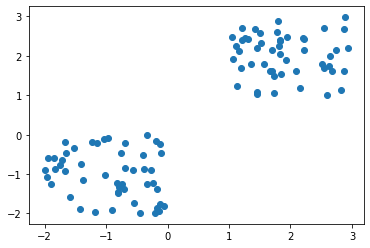

In [215]:
plt.scatter(df['x'], df['y'])

In [217]:
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
df['label'] = kmeans.fit_predict(df)
df.tail()

,x,y,label
95,2.864175,1.614406,1
96,2.818155,1.130185,1
97,1.112926,2.258714,1
98,1.210066,2.403444,1
99,1.351820,1.804158,1


[[-1.06391192 -0.97012868]
 [ 2.09713403  2.05472028]]


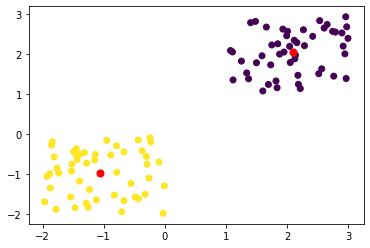

In [108]:
print(centroids)

plt.scatter(df['x'], df['y'], c= df['label'])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

In [250]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.9, random_state=0)

df = pd.DataFrame(X, columns=['x','y'])
df.head()

,x,y
0,0.227652,2.755707
1,-1.496359,7.196705
2,1.244684,5.497535
3,-0.903797,7.804642
4,0.879393,2.389981


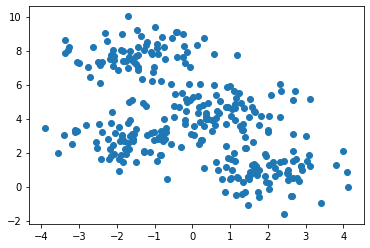

In [251]:
plt.scatter(df['x'], df['y'])

In [252]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
df['kmean_label'] = kmeans.fit_predict(df)


df['True_label'] = y

[[ 1.98345909  0.85592657]
 [-1.45052775  7.78696146]
 [-1.57553756  2.79999831]
 [ 0.91296517  4.54286627]]


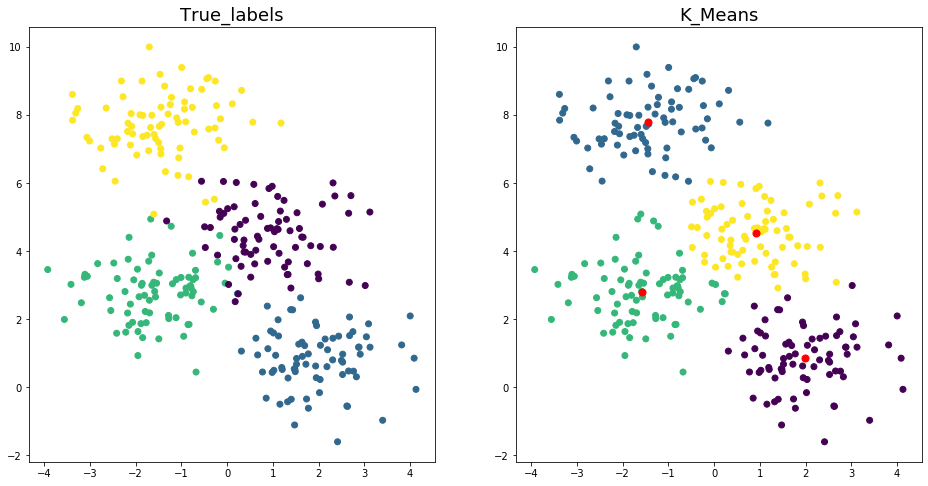

In [253]:
print(centroids)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(df['x'], df['y'], c=df['True_label'])
ax2.scatter(df['x'], df['y'], c=df['kmean_label'])
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
ax1.set_title('True_labels', fontsize=18)
ax2.set_title('K_Means', fontsize=18)
plt.show()

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

In [256]:
Data = {'x': [random.randint(1,101) for i in range(50)],
        'y': [random.randint(1,101) for i in range(50)]}
  
df = pd.DataFrame(Data,columns=['x','y'])
df.head()

,x,y
0,42,85
1,29,66
2,9,21
3,79,95
4,67,45


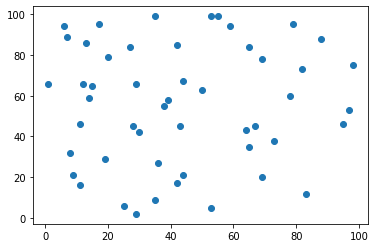

In [257]:
plt.scatter(df['x'], df['y'])
plt.show()

In [261]:
kmeans = KMeans(n_clusters=6).fit(df)
centroids = kmeans.cluster_centers_
df['label'] = kmeans.fit_predict(df)

[[84.42857143 74.57142857  2.        ]
 [28.27272727 16.81818182  0.        ]
 [51.5        93.33333333  1.16666667]
 [73.71428571 34.14285714  2.        ]
 [13.2        78.3         1.        ]
 [34.66666667 54.11111111  0.55555556]]


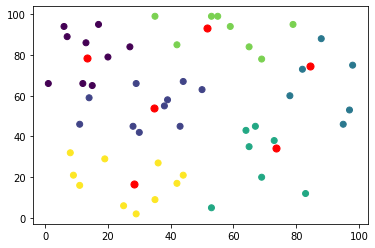

In [262]:
print(centroids)

plt.scatter(df['x'], df['y'], c= df['label'])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

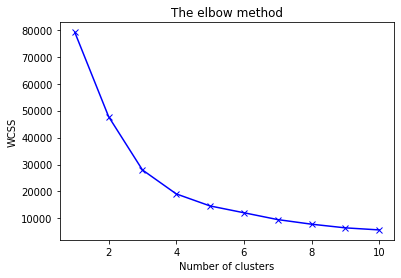

In [263]:
# We use WCSS (within cluster sum of squares) to find the optimum number of clusters for k-means classification 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [264]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
df['label'] = kmeans.fit_predict(df)

[[76.77777778 39.11111111  2.66666667]
 [24.05882353 75.05882353  0.82352941]
 [72.         87.22222222  3.33333333]
 [28.2        24.2         3.8       ]]


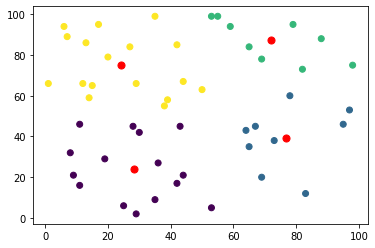

In [265]:
print(centroids)

plt.scatter(df['x'], df['y'], c= df['label'])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

In [287]:
iris = datasets.load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [288]:
df=pd.DataFrame(iris['data'], columns= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [289]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

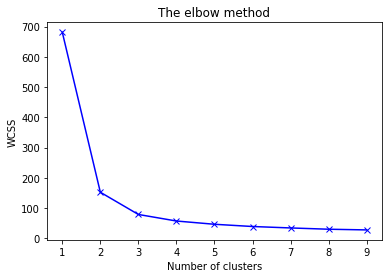

In [290]:
# We use WCSS (within cluster sum of squares) to find the optimum number of clusters for k-means classification 

wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [291]:
kmeans = KMeans(n_clusters=3).fit(df)
df['kmeans_label'] = kmeans.fit_predict(df)

# Adding the actual 
df['True_labels']=iris['target']

In [292]:
# df.corr()

In [293]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# ax1.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['True_labels'])
# ax2.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['kmeans_label'], cmap=plt.cm.Set2)
# ax1.set_title('True_labels', fontsize=18)
# ax2.set_title('K_Means', fontsize=18)
# plt.show()

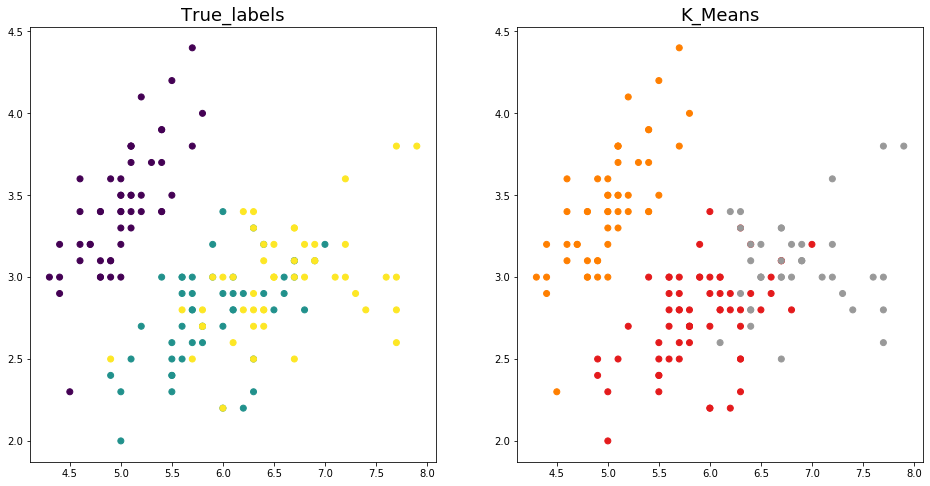

In [294]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['True_labels'])
ax2.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['kmeans_label'], cmap=plt.cm.Set1)
ax1.set_title('True_labels', fontsize=18)
ax2.set_title('K_Means', fontsize=18)
plt.show()

In [295]:
print(accuracy_score(df['True_labels'], df['kmeans_label']))
print(r2_score(df['True_labels'], df['kmeans_label']))

0.24
-0.56


<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<bd>

In [296]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [297]:
#df.replace({"Gender":{"Male":0, "Female":1}}, inplace=True)
df.drop(columns="CustomerID", inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


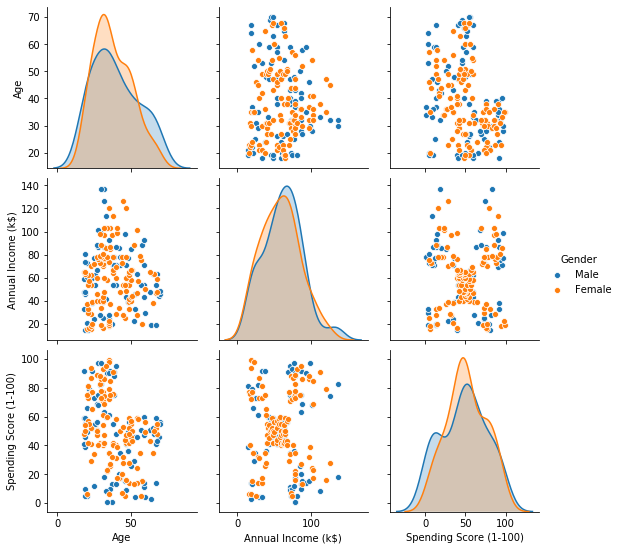

In [298]:
sns.pairplot(df, hue='Gender')
plt.show()

In [299]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [300]:
df.drop(columns="Gender", inplace=True)

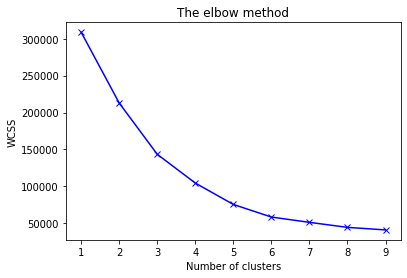

In [301]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [302]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
df['label'] = kmeans.fit_predict(df)

[[32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


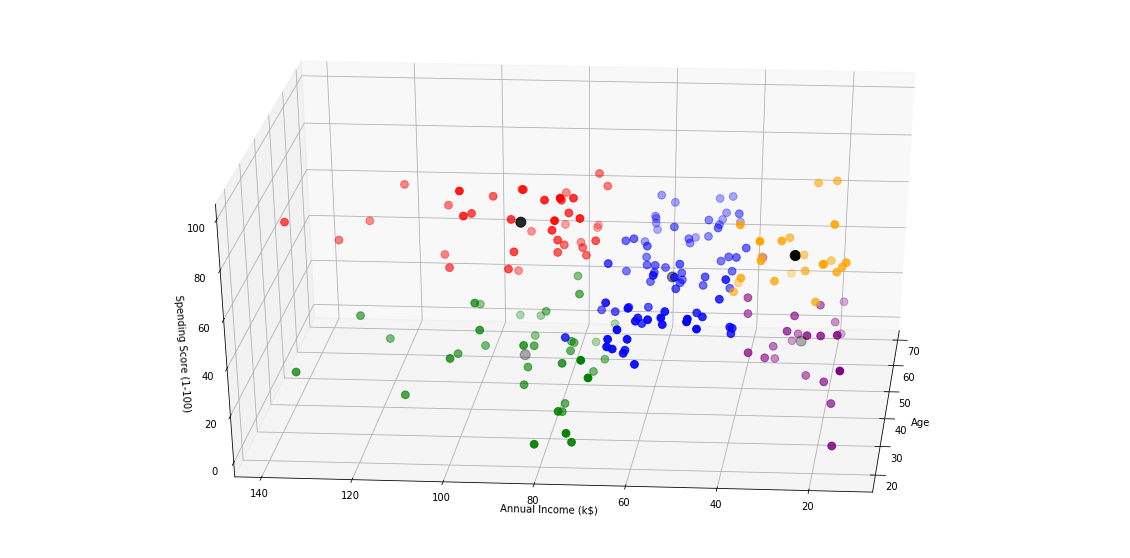

In [210]:
print(centroids)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(centroids[:, 0], centroids[:, 1],  centroids[:, 2], c='black', s=100)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [311]:
df.loc[df['label']==2].mean()

Age                       43.088608
Annual Income (k$)        55.291139
Spending Score (1-100)    49.569620
label                      2.000000
dtype: float64

<br>

<br>

<br>

<br>

# K-Means Advantages :

### 1) The fastest machine learning clustering algorithms
### 2) Relatively simple to implement.

<br>

<br>

<br>

<br>

# K-Means Disadvantages :

### 1) Difficult to predict K-Value.
### 2) Being dependent on initial values.

### 3) Kmeans doesnt work well for non-globular structures

![SegmentLocal](kmeans-clustering-plot.png "segment")

![SegmentLocal](SlpL1.png "segment")